In [1]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 67.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 72.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 52.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 108.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 44.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import ktrain
from ktrain import vision as vis

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import ktrain
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

age_predictor_path = '/content/drive/MyDrive/age_predictor_new'
gender_predictor_path = '/content/drive/MyDrive/gender_predictor'

# Load the predictors
age_predictor = ktrain.load_predictor(age_predictor_path)
gender_predictor = ktrain.load_predictor(gender_predictor_path)

def predict_age_and_gender(image_path):
    age = age_predictor.predict_filename(image_path)[0]
    gender = gender_predictor.predict_filename(image_path)[0]
    return age, gender

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def get_age_interval(age):
    if age < 10:
      return '1-6'
    elif age < 20:
        return '12-18'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60+'


Predicted Age: 1-6
Predicted Gender: Female


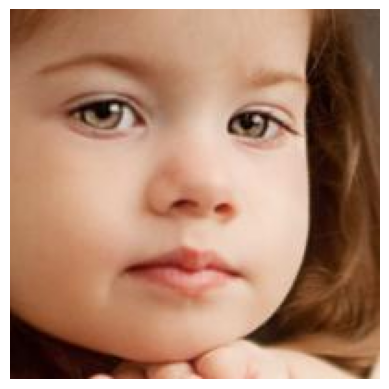

Predicted Age: 20-29
Predicted Gender: Male


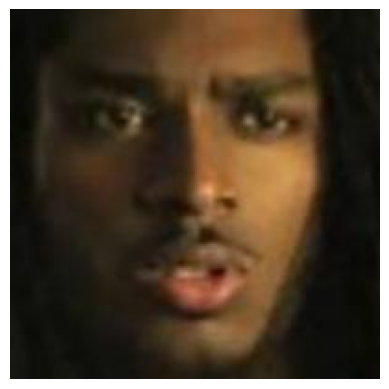

In [8]:
image_paths = [
    '/content/drive/MyDrive/UTKFaces/3_1_0_20170109191511657.jpg.chip.jpg',
    '/content/drive/MyDrive/UTKFaces/24_0_1_20170113134107281.jpg.chip.jpg'
]

from PIL import Image
import tempfile

for image_path in image_paths:
    if os.path.exists(image_path):

          # Resize image to 200x200
        img = Image.open(image_path)
        img = img.resize((200, 200))

        # Save resized image to a temporary file
        temp_file = tempfile.NamedTemporaryFile(suffix='.jpg')
        img.save(temp_file.name)

        # Predict age and gender
        predicted_age, predicted_gender = predict_age_and_gender(temp_file.name)
        rounded_age = int(round(predicted_age))
        gender = 'Female' if predicted_gender == '1' else 'Male'
        age_interval = get_age_interval(rounded_age)
        print('Predicted Age:', age_interval)
        print('Predicted Gender:', gender)

        # Display the image
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        print('Image path does not exist:', temp_file.name)
